Lets connect to the MariaDB running on my Hassio using the official addon https://www.home-assistant.io/addons/mariadb/
One issue to raise is that the [recorder](https://www.home-assistant.io/components/recorder/) is purging data older than 10 days by default. Therefore I configure my recorder to record 1 year of data:
```yaml
recorder:
  db_url: !secret madia_db
  purge_keep_days: 365
 ```

In [1]:
# To import detective from relative folder# To im 
import os
import sys
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import detective.core as detective
import detective.helpers as helpers
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # Suppress chained_assignment warning, default='warn'
import seaborn as sns
from sqlalchemy import text
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
credentials_file = "/Users/robincole/desktop/hassio_mariadb_creds.json"

In [3]:
creds = helpers.load_credentials(credentials_file)

In [4]:
creds.keys()

dict_keys(['user', 'password'])

In [5]:
creds['user']

'hass'

In [6]:
user = creds['user']
password = creds['password']
SERVER_IP = '192.168.0.28'
PORT = '3306'
DB_NAME = 'homeassistant'

DB_URL = "mysql+pymysql://{}:{}@{}:{}/{}?charset=utf8".format(user, password, SERVER_IP, PORT, DB_NAME)

In [7]:
db = detective.HassDatabase(DB_URL)

Successfully connected to database
There are 122 entities with data


In [8]:
db.domains

['binary_sensor',
 'sun',
 'automation',
 'group',
 'script',
 'counter',
 'device_tracker',
 'timer',
 'zone',
 'input_text',
 'switch',
 'sensor',
 'camera',
 'light',
 'updater',
 'persistent_notification',
 'input_boolean']

In [10]:
%%time
db.fetch_all_data()

Querying the database, this could take a while
master_df created successfully.
CPU times: user 5.53 s, sys: 572 ms, total: 6.1 s
Wall time: 17.9 s


In [11]:
sensors_num_df = detective.NumericalSensors(db.master_df)

In [13]:
sensors_num_df.entities[0:10]

['sensor.speedtest_download',
 'sensor.time_in_bed',
 'sensor.work_to_home',
 'sensor.home_to_work',
 'sensor.motion',
 'sensor.number_of_files_motion',
 'sensor.bayes_probability',
 'sensor.home_to_waterloo',
 'sensor.blink_blink_camera_percy_notifications',
 'sensor.blink_blink_camera_percy_temperature']

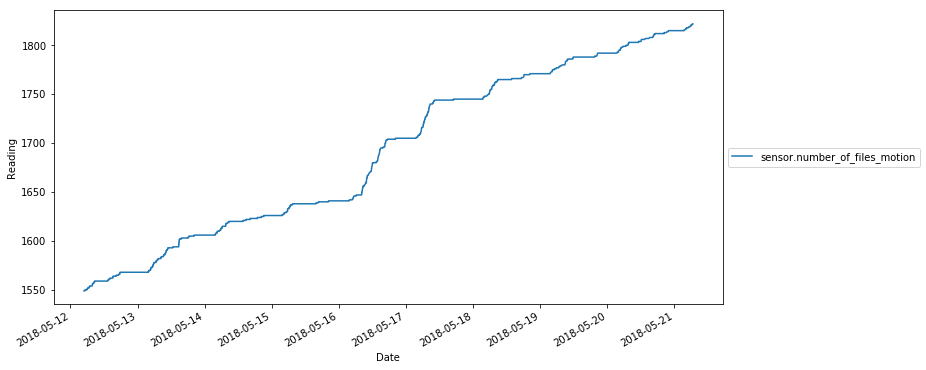

In [15]:
sensors_num_df.plot(sensors_num_df.entities[5])